In [2]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('credit_data.csv')
valores_faltantes = data.isnull().sum() # Somando a quantidade de valores nulls de todas as colunas
print(valores_faltantes)
data.dropna(inplace=True) # Deletando linhas com valores null

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64


In [4]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [5]:
np.unique(y, return_counts=True) # verificar quantidade de valores y

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # stratify muito bom para conjuntos y desbalanceados

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

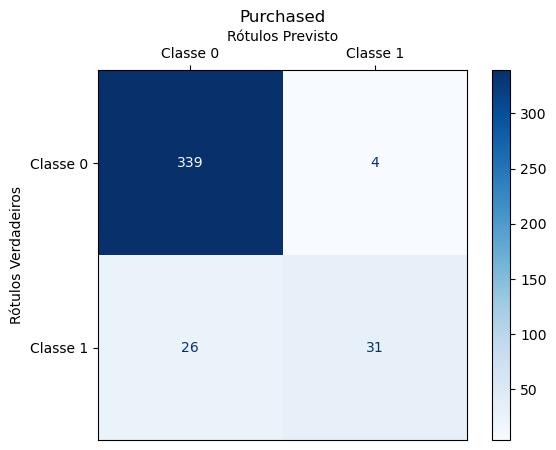

Acurácia: 92.50%


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Classe 0', 'Classe 1']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Purchased")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")

In [11]:
# Procentual de acerto para pessoas quem pagam o empréstimo
339 / (339 + 4)

0.9883381924198251

In [12]:
# Procentual de acerto para pessoas quem não pagam o empréstimo
31 / (31 + 26)

0.543859649122807

In [13]:
np.unique(y_train, return_counts=True) # verificar quantidade de valores y

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [14]:
# Subamostragem Oversampling após o SMOTE, faz um cálculo de distância entre os dados minoritários, e gera novos valores sientéticos para proporcionar
from imblearn.over_sampling import SMOTE
st = SMOTE(sampling_strategy='minority')
X_over, y_over = st.fit_resample(X, y)

In [15]:
np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [16]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier_o = GaussianNB()
classifier_o.fit(X_train_o, y_train_o)

GaussianNB()

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred_o = classifier_o.predict(X_test_o)
cm_o = confusion_matrix(y_test_o, y_pred_o)
ac_o = accuracy_score(y_test_o, y_pred_o)

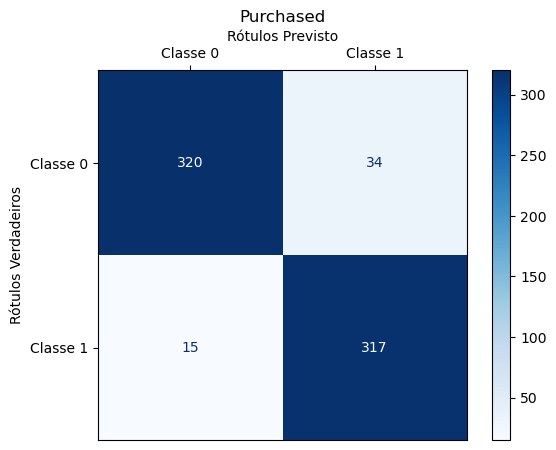

Acurácia: 92.86%


In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Classe 0', 'Classe 1']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm_o, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Purchased")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo
print(f"Acurácia: {ac_o:.2%}")